<a href="https://colab.research.google.com/github/tjgustjr30723/linear-algebra2/blob/main/%EC%84%9C%ED%98%84%EC%84%9D_%EC%84%A0%EB%8C%802_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

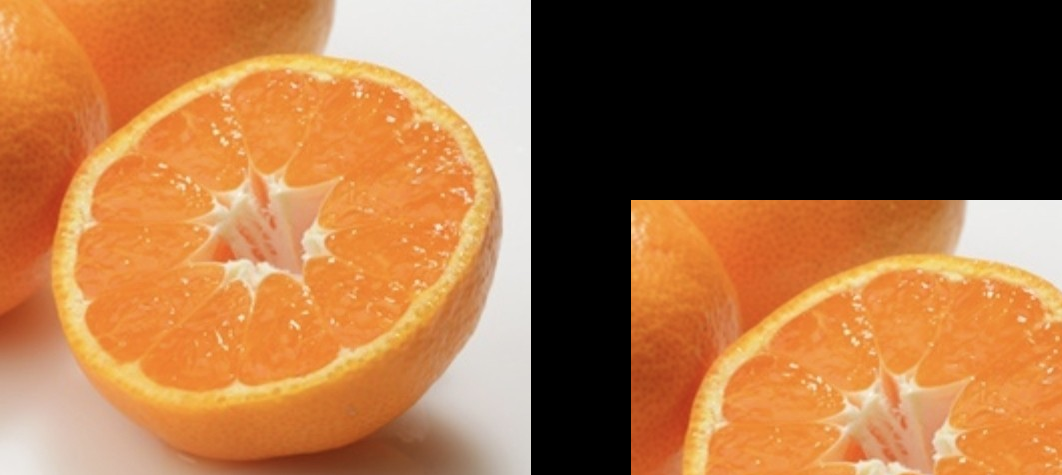

-1

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img=cv2.imread('/content/drive/MyDrive/Colab Notebooks/linear_a2/3 image.jpeg', cv2.IMREAD_COLOR)
height, width=img.shape[:2]
M=np.array([[1, 0, 100], [0, 1, 200]], dtype=float)

dst=cv2.warpAffine(img, M, (width, height))
result=cv2.hconcat([img, dst])
cv2_imshow(result)
cv2.waitKey(0)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


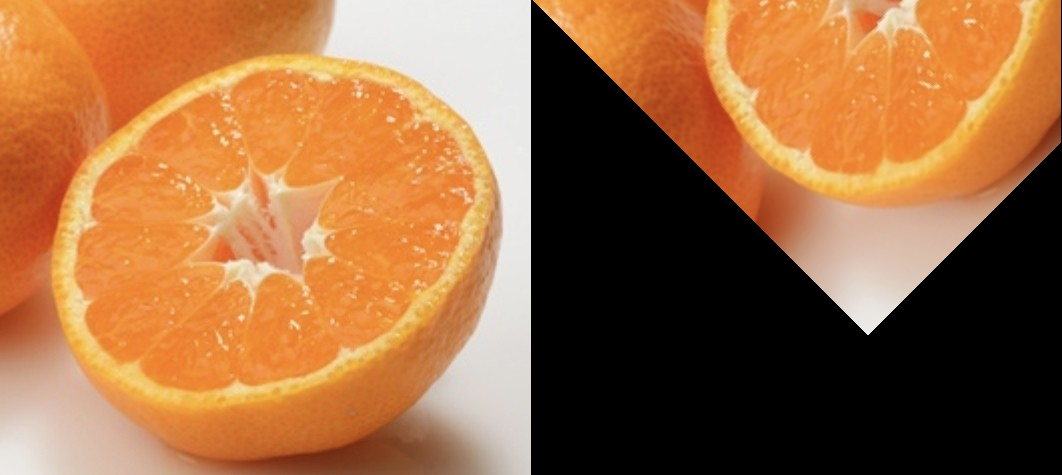

-1

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img=cv2.imread('/content/drive/MyDrive/Colab Notebooks/linear_a2/3 image.jpeg', cv2.IMREAD_COLOR)
height, width=img.shape[:2]
angle=45
radian=angle*np.pi/180
c=np.cos(radian)
s=np.sin(radian)

rotation_matrix=np.array([[c, s, 0], [-s, c, 0], [0, 0, 1]], dtype=float)
dst=np.zeros(img.shape, dtype=np.uint8)
for y in range(height-1):
    for x in range(width-1):
        new_p=np.array([x, y, 1])
        inv_rotation_matrix=np.linalg.inv(rotation_matrix)
        old_p=np.dot(inv_rotation_matrix, new_p)
        x_, y_=old_p[:2]
        x_=int(x_)
        y_=int(y_)
        if x_>0 and x_<width and y_>0 and y_<height:
            dst[y, x]=img[y_, x_]
result=cv2.hconcat([img, dst])
cv2_imshow(result)
cv2.waitKey(0)


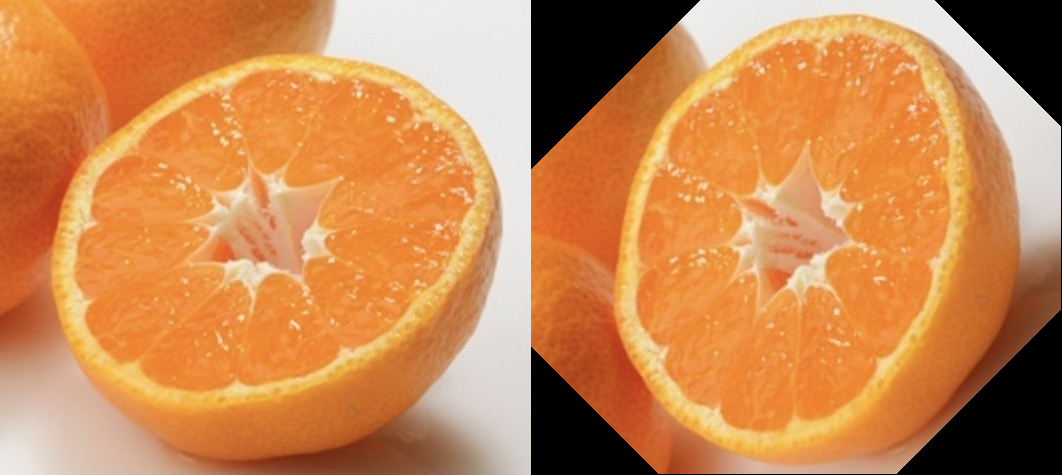

-1

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img=cv2.imread('/content/drive/MyDrive/Colab Notebooks/linear_a2/3 image.jpeg', cv2.IMREAD_COLOR)
height, width=img.shape[:2]
angle=45
radian=angle*np.pi/180
c=np.cos(radian)
s=np.sin(radian)
center_x=width/2
center_y=height/2
rotation_matrix=np.array([[c, s, (1-c)*center_x-s*center_y], [-s, c, s*center_x+(1-c)*center_y], [0, 0, 1]])
dst=np.zeros(img.shape, dtype=np.uint8)
for y in range(height-1):
    for x in range(width-1):
        new_p=np.array([x, y, 1])
        inv_rotation_matrix=np.linalg.inv(rotation_matrix)
        old_p=np.dot(inv_rotation_matrix, new_p)
        x_, y_=old_p[:2]
        x_=int(x_)
        y_=int(y_)
        if x_>0 and x_<width and y_>0 and y_<height:
            dst[y, x]=img[y_, x_]
result=cv2.hconcat([img, dst])
cv2_imshow(result)
cv2.waitKey(0)

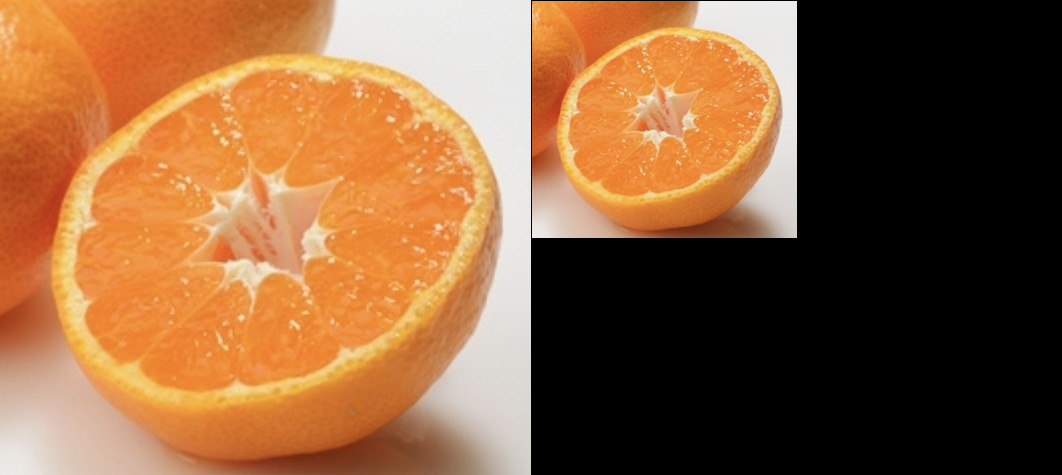

-1

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img=cv2.imread('/content/drive/MyDrive/Colab Notebooks/linear_a2/3 image.jpeg', cv2.IMREAD_COLOR)
height, width = img.shape[:2]
scale_factor =0.5
scaling_matrix=np.array([[scale_factor,0,0],[0,scale_factor,0],[0,0,1]])
dst=np.zeros((height,width,img.shape[2]), dtype=np.uint8)
for y in range(height):
    for x in range(width):
        new_p=np.array([x,y,1])
        inv_scaling_matrix=np.linalg.inv(scaling_matrix)
        old_p = np.dot(inv_scaling_matrix,new_p)
        x_,y_=old_p[:2]
        x_=int(x_)
        y_=int(y_)
        if x_>0 and x_<width and y_ >0 and y_ < height:
            dst.itemset((y,x,0),img.item(y_,x_,0))
            dst.itemset((y,x,1),img.item(y_,x_,1))
            dst.itemset((y,x,2),img.item(y_,x_,2))

result=cv2.hconcat([img, dst])
cv2_imshow(result)
cv2.waitKey(0)

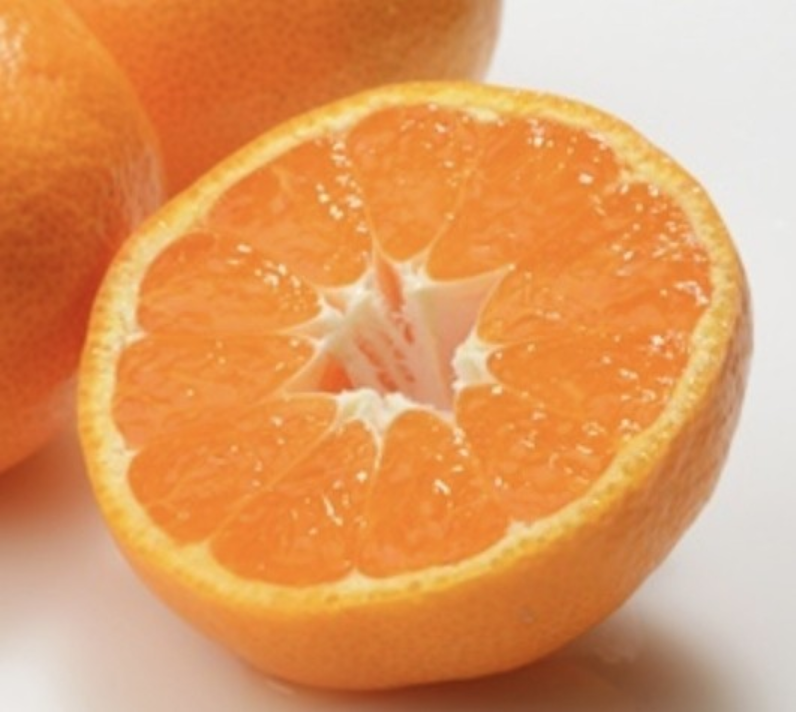

-1

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img=cv2.imread('/content/drive/MyDrive/Colab Notebooks/linear_a2/3 image.jpeg', cv2.IMREAD_COLOR)
height, width = img.shape[:2]
dst=cv2.resize(img,(int(width*1.5),int(height*1.5)))

cv2_imshow(dst)
cv2.waitKey(0)

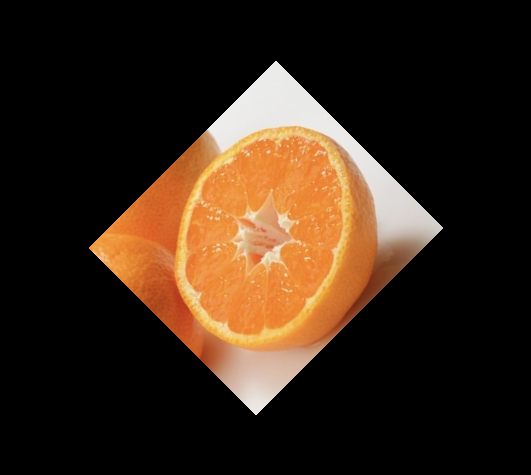

-1

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img=cv2.imread('/content/drive/MyDrive/Colab Notebooks/linear_a2/3 image.jpeg', cv2.IMREAD_COLOR)
height, width = img.shape[:2]
scale_factor =0.5
scaling_matrix=np.array([[scale_factor,0,0],[0,scale_factor,0],[0,0,1]])
translation_matrix=np.array([[1,0,width/4],[0,1,height/4],[0,0,1]])
angle=45
radian=angle*np.pi/180
c=np.cos(radian)
s=np.sin(radian)
center_x = width/2
center_y = height/2
rotation_matrix=np.array([[c, s, (1-c)*center_x-s*center_y], [-s, c, s*center_x+(1-c)*center_y], [0, 0, 1]])

T=np.eye(3)
T=np.dot(scaling_matrix,T)
T=np.dot(translation_matrix,T)
T=np.dot(rotation_matrix,T)
dst=np.zeros((height,width,img.shape[2]), dtype=np.uint8)

for y in range(height):
    for x in range(width):
        new_p=np.array([x,y,1])
        inv_scaling_matrix=np.linalg.inv(T)
        old_p = np.dot(inv_scaling_matrix,new_p)
        x_,y_=old_p[:2]
        x_=int(x_)
        y_=int(y_)
        if x_>0 and x_<width and y_ >0 and y_ < height:
            dst.itemset((y,x,0),img.item(y_,x_,0))
            dst.itemset((y,x,1),img.item(y_,x_,1))
            dst.itemset((y,x,2),img.item(y_,x_,2))

cv2_imshow(dst)
cv2.waitKey(0)

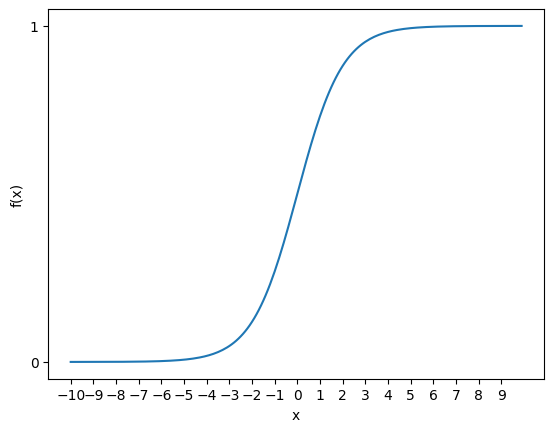

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
x=np.arange(-10,10,0.1)
f=1/(1+np.exp(-x))
ax.plot(x,f)
ax.set_xticks(range(-10,10))
ax.set_yticks(range(0,2))
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
plt.show()

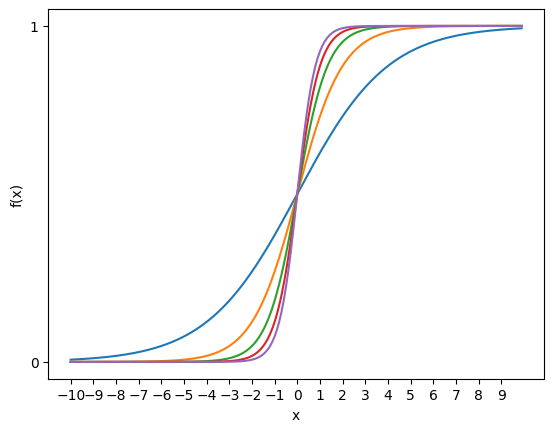

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
x=np.arange(-10,10,0.1)
W=np.arange(0.5,3,0.5)
for w in W:
    f=1/(1+np.exp(-x*w))
    ax.plot(x,f)

ax.set_xticks(range(-10,10))
ax.set_yticks(range(0,2))
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
plt.show()

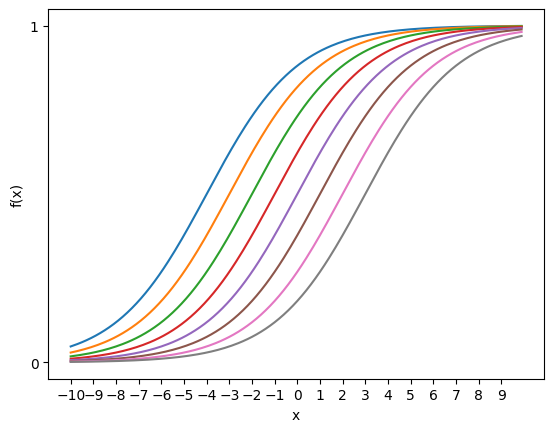

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
x=np.arange(-10,10,0.1)
w=0.5
B=np.arange(-2,2,0.5)
for b in B:
    f=1/(1+np.exp(-x*w+b))
    ax.plot(x,f)
ax.set_xticks(range(-10,10))
ax.set_yticks(range(0,2))
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
plt.show()